# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv', sep='\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

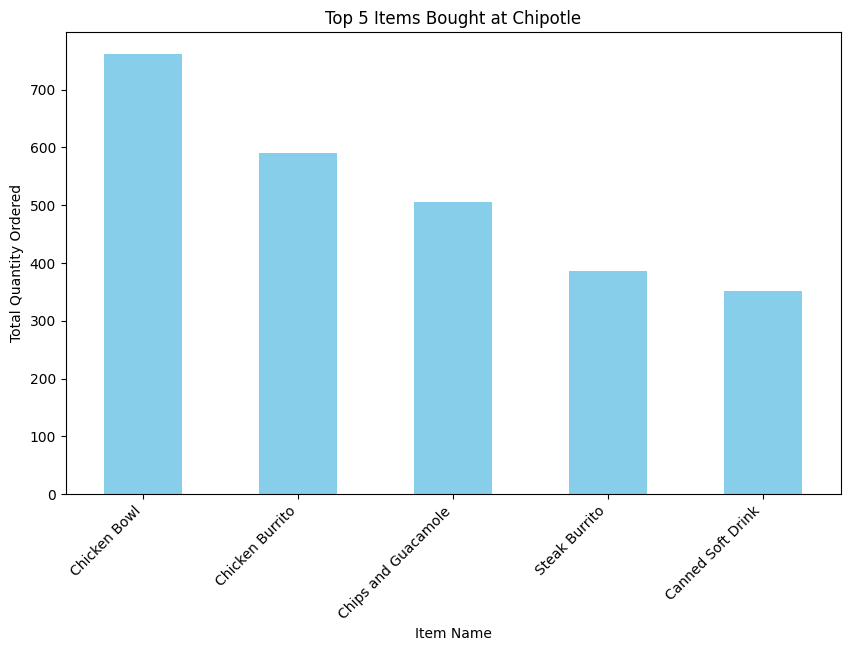

In [5]:
item_quantities = chipo.groupby('item_name')['quantity'].sum()

top_5_items = item_quantities.sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
top_5_items.plot(kind='bar', color='skyblue')
plt.title('Top 5 Items Bought at Chipotle')
plt.xlabel('Item Name')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45, ha='right')
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

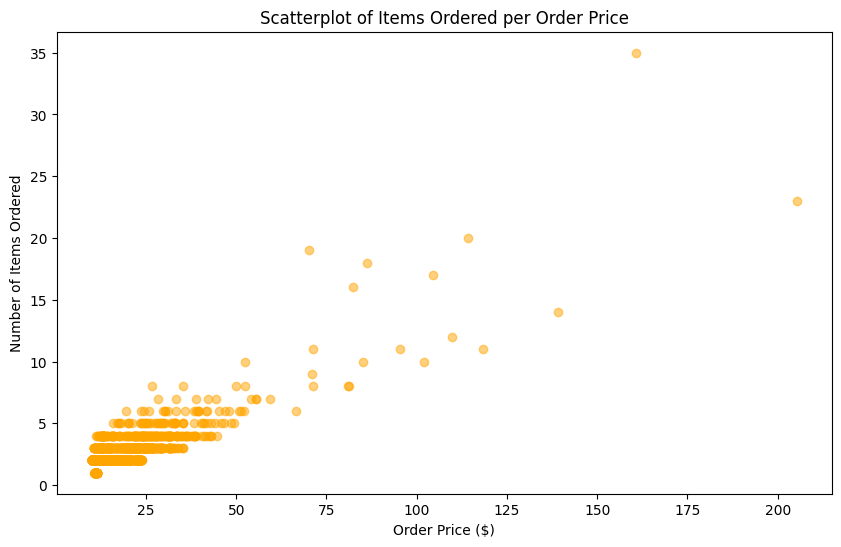

In [6]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

order_data = chipo.groupby('order_id').agg({'item_price': 'sum', 'quantity': 'sum'})

plt.figure(figsize=(10, 6))
plt.scatter(order_data['item_price'], order_data['quantity'], alpha=0.5, color='orange')
plt.title('Scatterplot of Items Ordered per Order Price')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Items Ordered')
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [9]:
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

order_prices = chipo.groupby('order_id')['item_price'].sum()

plt.figure(figsize=(10, 6))
plt.hist(order_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Order Prices in Chipotle Dataset')
plt.xlabel('Order Price ($)')
plt.ylabel('Number of Orders')
plt.show()


TypeError: 'float' object is not subscriptable